# Importando as bibliotecas

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lendo a base de dados

In [2]:
df_promental = pd.read_csv('./bancosaudemental.csv', 
                           delimiter=';', encoding='ISO-8859-1')
df_promental.head()

,SAMPLEID,SC1,SC1_1,SC2,SC2A,SC3,SC3A,SC7,SC8_1,SC8_2,...,notreat12_notsevere,notreat12_anypredisposing,notreat12_service,qids_none,qids_mild,qids_mod,qids_sev,qids_vsev,qids_sevverysev,_merge
0,3201000001-01,32,1,4,4.0,5,1.0,2,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)
1,3201000002-01,31,1,8,4.0,5,1.0,3,3,3,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)
2,3201000003-01,60,1,9,4.0,1,NaN,2,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,matched (3)
3,3201000004-01,34,1,5,4.0,5,1.0,3,3,2,...,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)
4,3201000005-01,84,2,41,4.0,4,5.0,3,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)


In [3]:
lines, columns = df_promental.shape
lines, columns

(5037, 2075)

In [4]:
df_promental.dtypes

SAMPLEID            object
SC1                  int64
SC1_1                int64
SC2                  int64
SC2A               float64
                    ...   
qids_mod           float64
qids_sev           float64
qids_vsev          float64
qids_sevverysev    float64
_merge              object
Length: 2075, dtype: object

# Descrevendo os dados

### 1. Criação de um dataframe para descrição de dados
Utilizando o comando describe + *.T* para conseguir a transposta desse DF

In [5]:
df_describe = df_promental.describe(include='all').T

In [6]:
df_describe

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SAMPLEID,5037,5037,3201000001-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SC1,5037.0,NaN,NaN,NaN,41.517769,15.005041,18.0,29.0,40.0,52.0,93.0
SC1_1,5037.0,NaN,NaN,NaN,1.565813,0.495699,1.0,1.0,2.0,2.0,2.0
SC2,5037.0,NaN,NaN,NaN,16.527695,43.349269,1.0,5.0,11.0,22.0,999.0
SC2A,5028.0,NaN,NaN,NaN,3.88564,0.364324,1.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
qids_mod,501.0,NaN,NaN,NaN,0.295409,0.456682,0.0,0.0,0.0,1.0,1.0
qids_sev,501.0,NaN,NaN,NaN,0.321357,0.467464,0.0,0.0,0.0,1.0,1.0
qids_vsev,501.0,NaN,NaN,NaN,0.263473,0.440957,0.0,0.0,0.0,1.0,1.0
qids_sevverysev,501.0,NaN,NaN,NaN,0.58483,0.493244,0.0,0.0,1.0,1.0,1.0


### 2. Adicionando coluna com a porcentagem de nulos

In [7]:
amount_nulls = df_promental.isnull().sum() / lines * 100
df_describe['nulls %'] = amount_nulls

### 3. Adicionando coluna com os tipos de dados de cada coluna
Através do comando dtypes no dataframe original

In [8]:
df_describe['tipos'] = df_promental.dtypes

In [9]:
df_describe

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,nulls %,tipos
SAMPLEID,5037,5037,3201000001-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,object
SC1,5037.0,NaN,NaN,NaN,41.517769,15.005041,18.0,29.0,40.0,52.0,93.0,0.000000,int64
SC1_1,5037.0,NaN,NaN,NaN,1.565813,0.495699,1.0,1.0,2.0,2.0,2.0,0.000000,int64
SC2,5037.0,NaN,NaN,NaN,16.527695,43.349269,1.0,5.0,11.0,22.0,999.0,0.000000,int64
SC2A,5028.0,NaN,NaN,NaN,3.88564,0.364324,1.0,4.0,4.0,4.0,4.0,0.178678,float64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
qids_mod,501.0,NaN,NaN,NaN,0.295409,0.456682,0.0,0.0,0.0,1.0,1.0,90.053603,float64
qids_sev,501.0,NaN,NaN,NaN,0.321357,0.467464,0.0,0.0,0.0,1.0,1.0,90.053603,float64
qids_vsev,501.0,NaN,NaN,NaN,0.263473,0.440957,0.0,0.0,0.0,1.0,1.0,90.053603,float64
qids_sevverysev,501.0,NaN,NaN,NaN,0.58483,0.493244,0.0,0.0,1.0,1.0,1.0,90.053603,float64


### 4. Removendo colunas que possuem +80% dos seus valores nulos
Ainda sobraram 791 colunas no dataframe

In [10]:
df_describe[df_describe['nulls %'] > 80]

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,nulls %,tipos
CC2,50.0,NaN,NaN,NaN,2.12,0.91785,1.0,1.0,2.0,3.0,3.0,99.007346,float64
CC2A01,50.0,NaN,NaN,NaN,5.76,3.347616,1.0,2.25,5.5,9.75,10.0,99.007346,float64
CC2A02,5.0,NaN,NaN,NaN,8.6,1.949359,6.0,7.0,10.0,10.0,10.0,99.900735,float64
CC2A03,2.0,NaN,NaN,NaN,10.0,0.0,10.0,10.0,10.0,10.0,10.0,99.960294,float64
CC2A04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,float64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
qids_mild,501.0,NaN,NaN,NaN,0.101796,0.302683,0.0,0.0,0.0,0.0,1.0,90.053603,float64
qids_mod,501.0,NaN,NaN,NaN,0.295409,0.456682,0.0,0.0,0.0,1.0,1.0,90.053603,float64
qids_sev,501.0,NaN,NaN,NaN,0.321357,0.467464,0.0,0.0,0.0,1.0,1.0,90.053603,float64
qids_vsev,501.0,NaN,NaN,NaN,0.263473,0.440957,0.0,0.0,0.0,1.0,1.0,90.053603,float64


In [11]:
columns_80nulls = df_describe[df_describe['nulls %'] > 80].index
df_promental.drop(columns=columns_80nulls, inplace=True)
df_promental

,SAMPLEID,SC1,SC1_1,SC2,SC2A,SC3,SC3A,SC7,SC8_1,SC8_2,...,notreat12_inconvenient,notreat12_anyenabling,notreat12_handleown,notreat12_ineffective,notreat12_stigma,notreat12_getbetter,notreat12_notsevere,notreat12_anypredisposing,notreat12_service,_merge
0,3201000001-01,32,1,4,4.0,5,1.0,2,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)
1,3201000002-01,31,1,8,4.0,5,1.0,3,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,matched (3)
2,3201000003-01,60,1,9,4.0,1,NaN,2,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,matched (3)
3,3201000004-01,34,1,5,4.0,5,1.0,3,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,matched (3)
4,3201000005-01,84,2,41,4.0,4,5.0,3,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,3214006521-01,40,2,3,4.0,1,NaN,2,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)
5033,3214006522-01,24,1,16,3.0,5,5.0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)
5034,3214006523-01,57,2,1,4.0,5,5.0,2,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,matched (3)
5035,3214006524-01,19,1,30,3.0,5,5.0,2,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)


In [12]:
df_describe = df_describe[df_describe['nulls %'] <= 80]
df_describe

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,nulls %,tipos
SAMPLEID,5037,5037,3201000001-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,object
SC1,5037.0,NaN,NaN,NaN,41.517769,15.005041,18.0,29.0,40.0,52.0,93.0,0.000000,int64
SC1_1,5037.0,NaN,NaN,NaN,1.565813,0.495699,1.0,1.0,2.0,2.0,2.0,0.000000,int64
SC2,5037.0,NaN,NaN,NaN,16.527695,43.349269,1.0,5.0,11.0,22.0,999.0,0.000000,int64
SC2A,5028.0,NaN,NaN,NaN,3.88564,0.364324,1.0,4.0,4.0,4.0,4.0,0.178678,float64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
notreat12_getbetter,2942.0,NaN,NaN,NaN,0.03705,0.188916,0.0,0.0,0.0,0.0,1.0,41.592218,float64
notreat12_notsevere,2942.0,NaN,NaN,NaN,0.03569,0.185548,0.0,0.0,0.0,0.0,1.0,41.592218,float64
notreat12_anypredisposing,2942.0,NaN,NaN,NaN,0.267165,0.442555,0.0,0.0,0.0,1.0,1.0,41.592218,float64
notreat12_service,2942.0,NaN,NaN,NaN,0.835146,0.371112,0.0,1.0,1.0,1.0,1.0,41.592218,float64


### 5. Selecionando as colunas relacionadas ao dataset de depressão e definindo a coluna target e a matriz com os atributos

In [13]:
depression_columns = []
for column in df_promental.columns:
    if 'SC' in column or 'D' in column[0]:
        depression_columns.append(column)
depression_columns

['SC1',
 'SC1_1',
 'SC2',
 'SC2A',
 'SC3',
 'SC3A',
 'SC7',
 'SC8_1',
 'SC8_2',
 'SC9',
 'SC19',
 'SC20',
 'SC20A',
 'SC20_1',
 'SC20_2',
 'SC20_3',
 'SC21',
 'SC22',
 'SC23',
 'SC24',
 'SC25',
 'SC25A',
 'SC26',
 'SC26A',
 'SC26B',
 'SC27A',
 'SC27B',
 'SC27C',
 'SC27D',
 'SC27E',
 'SC27F',
 'SC28',
 'SC29',
 'SC29A',
 'SC30',
 'SC31',
 'SC32',
 'SC33',
 'SC33_1',
 'SC33_2',
 'SC33_3',
 'SC34',
 'SC35',
 'D0',
 'D1',
 'D1A',
 'D12',
 'D12A',
 'D13',
 'D16',
 'D17',
 'D18',
 'D19',
 'D20',
 'D21',
 'D22',
 'D22A',
 'D22B',
 'D22B1',
 'D23',
 'D24A',
 'D24B',
 'D24C',
 'D24D',
 'D24E',
 'D24F',
 'D25',
 'D26A',
 'D26G',
 'D26I',
 'D26J',
 'D26L',
 'D26P',
 'D26R',
 'D26S',
 'D26T',
 'D26U',
 'D26W',
 'D26X',
 'D26Y',
 'D26Z',
 'D26AA',
 'D26BB',
 'D26CC',
 'D26FF',
 'D26GG',
 'D26HH',
 'D26II',
 'D27',
 'D27A',
 'D28',
 'D28A',
 'D29',
 'D29A',
 'D29D',
 'D37D',
 'D37E',
 'D37G',
 'D38',
 'D72',
 'D87_1',
 'D88']

In [14]:
X = df_promental[depression_columns] # Criando matriz com os atributos relacionados com depressão
y = df_promental['dsm_mddh'] # Vetor com coluna target

In [15]:
X

,SC1,SC1_1,SC2,SC2A,SC3,SC3A,SC7,SC8_1,SC8_2,SC9,...,D29,D29A,D29D,D37D,D37E,D37G,D38,D72,D87_1,D88
0,32,1,4,4.0,5,1.0,2,3,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.0
1,31,1,8,4.0,5,1.0,3,3,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0
2,60,1,9,4.0,1,NaN,2,4,4,1,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0
3,34,1,5,4.0,5,1.0,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0
4,84,2,41,4.0,4,5.0,3,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,40,2,3,4.0,1,NaN,2,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,15.0
5033,24,1,16,3.0,5,5.0,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5034,57,2,1,4.0,5,5.0,2,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5035,19,1,30,3.0,5,5.0,2,3,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
y

0       5
1       5
2       1
3       5
4       5
       ..
5032    5
5033    5
5034    5
5035    5
5036    5
Name: dsm_mddh, Length: 5037, dtype: int64

In [77]:
X_describe = X.describe().T
amount_nulls = X.isnull().sum()
X_describe['% nulls'] = amount_nulls * 100 // len(X)
X_describe['column_name'] = X_describe.index
X_describe

,count,mean,std,min,25%,50%,75%,max,% nulls,column_name
SC1,5037.0,41.517769,15.005041,18.0,29.0,40.0,52.0,93.0,0,SC1
SC1_1,5037.0,1.565813,0.495699,1.0,1.0,2.0,2.0,2.0,0,SC1_1
SC2,5037.0,16.527695,43.349269,1.0,5.0,11.0,22.0,999.0,0,SC2
SC2A,5028.0,3.885640,0.364324,1.0,4.0,4.0,4.0,4.0,0,SC2A
SC3,5037.0,2.619813,1.804864,1.0,1.0,2.0,5.0,9.0,0,SC3
...,...,...,...,...,...,...,...,...,...,...
D37G,1209.0,1.542597,0.498388,1.0,1.0,2.0,2.0,2.0,75,D37G
D38,1209.0,2.973532,2.029002,1.0,1.0,1.0,5.0,9.0,75,D38
D72,1209.0,3.395368,1.968084,1.0,1.0,5.0,5.0,9.0,75,D72
D87_1,3390.0,105.194985,305.401433,0.0,0.0,0.0,1.0,999.0,32,D87_1


<AxesSubplot:xlabel='column_name', ylabel='% nulls'>

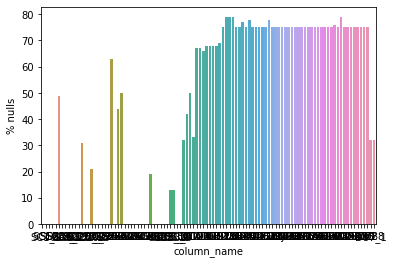

In [78]:
sns.barplot(x='column_name', y='% nulls', data=X_describe)

<AxesSubplot:xlabel='% nulls', ylabel='Count'>

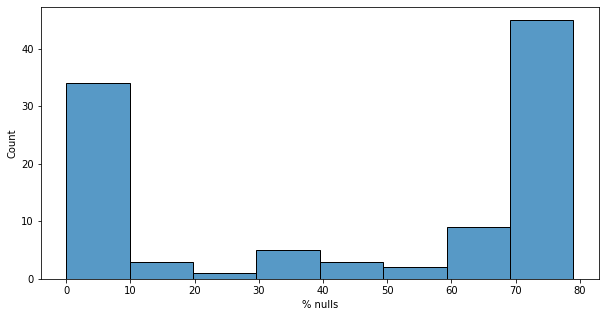

In [106]:
X_describe.groupby(['% nulls']).count()
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(X_describe['% nulls'], ax=ax)

<AxesSubplot:>

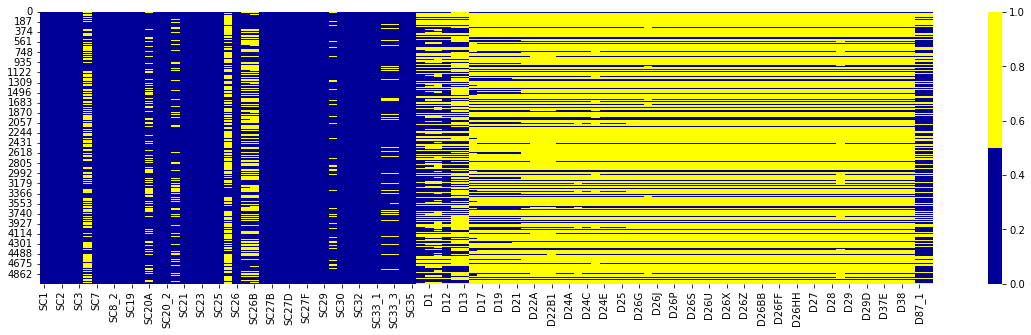

In [71]:
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(X.isnull(), cmap=sns.color_palette(['#000099', '#ffff00']) ,ax=ax)

<AxesSubplot:>

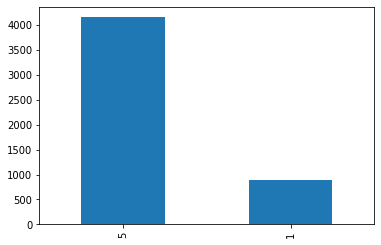

In [105]:
y.value_counts().plot(kind='bar')
# sns.barplot(x='0', y='1', data=y.value_counts())